## CS818 Assessment: notebook 1
First I need to import required packages, set up my environment, and do some initial exploratory analysis

In [1]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Set up matplotlib integration 
%matplotlib inline

# Display first rows of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


I know from the UC Irvine website that the data concerns obesity levels in Mexico, Peru and Colombia. Some initial data exploration will be helpful to better understand the shape of the dataset.

In [2]:
## Get a quick summary
df.info()

# Generate summary statistics
df.describe()

# Check for null values
df.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


The above show that we're working with a datset that has 2111 entries and 17 variables, and there are no missing values. We can now begin some more thorough analysis of some of the specific variables.

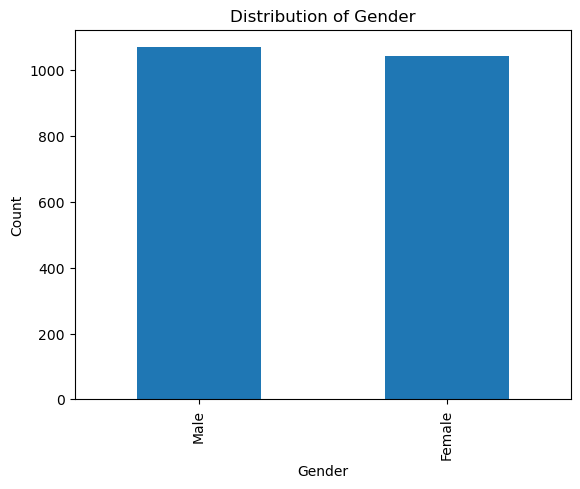

        Count Percentage
Gender                  
Male     1068     50.59%
Female   1043     49.41%


In [3]:
# Plot a bar chart for the gender composition of our data
df["Gender"].value_counts().plot.bar()
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Display the count and percentages for gender in a table
gender_count = df["Gender"].value_counts()
gender_percentage = (gender_count / gender_count.sum()) * 100
gender_summary = pd.DataFrame({
    "Count": gender_count,
    "Percentage": gender_percentage,
})

gender_summary["Percentage"] = gender_percentage.round(2).astype(str) + "%"
print(gender_summary)

Next we can consider the continuous demographic characteristics together

               Age       Height       Weight
count  2111.000000  2111.000000  2111.000000
mean     24.312600     1.701677    86.586058
std       6.345968     0.093305    26.191172
min      14.000000     1.450000    39.000000
25%      19.947192     1.630000    65.473343
50%      22.777890     1.700499    83.000000
75%      26.000000     1.768464   107.430682
max      61.000000     1.980000   173.000000


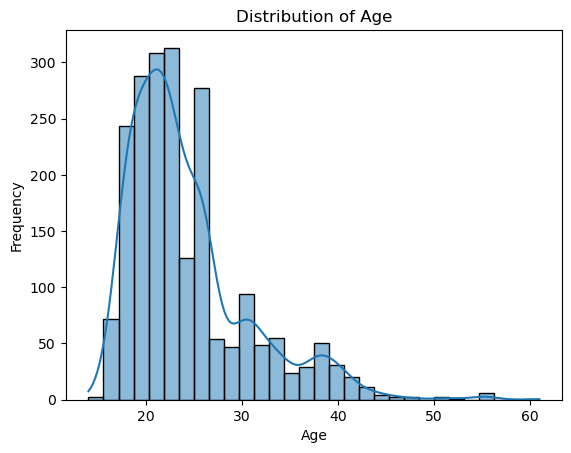

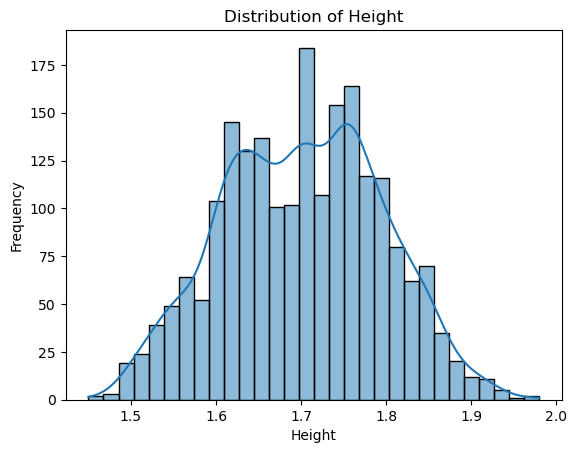

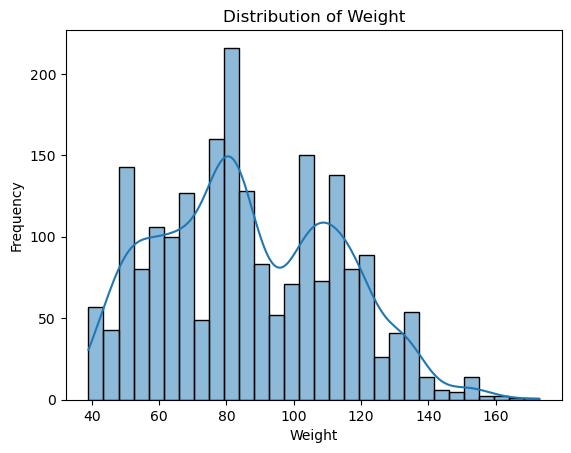

In [4]:
# Print summary statistics for the three continuous demographic characteristics Age, Height, and Weight
summary_stats = df[['Age', 'Height', 'Weight']].describe()
print(summary_stats)

# Create variables for Age, Height, and Weight
df_age = df['Age']
df_height = df['Height']
df_weight = df['Weight']

# Plot histograms for each
sns.histplot(df_age, bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("age_dist.pdf")
plt.show()

sns.histplot(df_height, bins=30, kde=True)
plt.title("Distribution of Height")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.savefig("height_dist.pdf")
plt.show()

sns.histplot(df_weight, bins=30, kde=True)
plt.title("Distribution of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.savefig("weight_dist.pdf")
plt.show()

And finally for our analysis of continuous variables, let's look at obesity levels

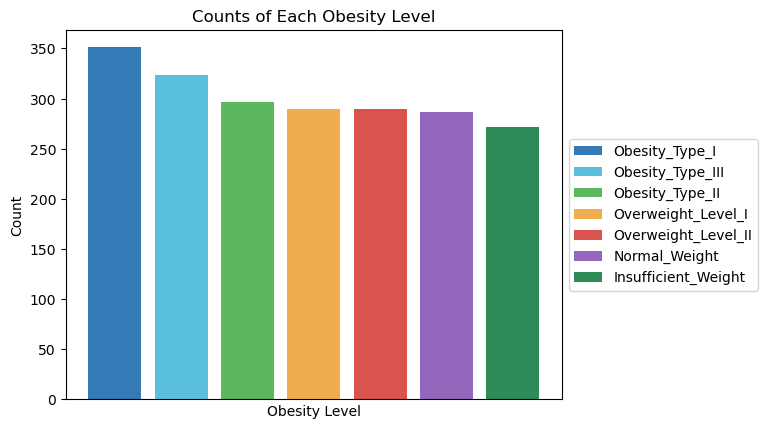

In [5]:
# Count occurrences of each obesity level and plot bar chart
obesity_counts = df["NObeyesdad"].value_counts()
colors = ["#337AB7", "#5BC0DE", "#5CB85C", "#F0AD4E", "#D9534F", "#9467BD", "#2E8B57"]
bars = plt.bar(obesity_counts.index, obesity_counts.values, color=colors) 

plt.title("Counts of Each Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.xticks([])
plt.legend(bars, obesity_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()